## Intro to Matrices, Tensors and Images

In [1]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import os

## Intro to Matrices via PyTorch 

In [2]:
# A matrix can be viewed as a 2-dimensional array of numbers.
# It can be thought of as 
# a collection of row vectors, or a collection of column vectors.

# For example, the training set for the cat-brain problem can be
# expressed as a matrix.
# Each input instance to the machine can be viewed as a vector
# represented by a row in this matrix.
# Our training set consists of 15 examples, where each example is
#  a row vectorof size 2. So there are 15 rows and 2 columns.

X = torch.tensor([[0.11, 0.09], [0.01, 0.02], [0.98, 0.91], [0.12, 0.21],
              [0.98, 0.99], [0.85, 0.87], [0.03, 0.14], [0.55, 0.45],
              [0.49, 0.51], [0.99, 0.01], [0.02, 0.89], [0.31, 0.47],
              [0.55, 0.29], [0.87, 0.76], [0.63, 0.24]])

#Output threat score will be modeled as a vector
y = torch.tensor([-0.8, -0.97, 0.89, -0.67, 0.97, 0.72, -0.83, 0.00, 0.00,
              0.00, -0.09, -0.22, -0.16, 0.63, 0.37])

# Shape of the matrix is depicted as a list.
# The first list element represents the number of rows,
# the second list element represents the number of columns.
# Our training set consists of 15 examples, where each example is a
#  row vector of size 2. So the shape is [15, 2].
print("Shape of the matrix is: {}".format(X.shape))

# Slicing the matrix
# The matrix can be sliced using the indices representing the axes. 

# Accessing individual elements of the matrix
# Each element is indexed by its row and column.
# Row, column indices start from 0

# Accessing first element of the matrix
first_element = X[0, 0]
print("First element: {}".format(first_element))

# Accessing 5th row, first column of the matrix
print("X[5][1]: {}".format(X[5][1]))

# Accessing the rows
# Note the each row corresponds to one training example in our case.
# The : is shorthand to access all the elements of the selected rows
# i.e X[0, :] is equivalent of X[0, 0:num_columns]
row_1 = X[0, :] # First row has an index of 0
row_2 = X[1, 0:2] # Second row has an index of 1
print("Row 1: {} Shape: {}".format(row_1, row_1.shape))
print("Row 2: {} Shape: {}".format(row_2, row_2.shape))

# Accessing the columns
# The columns can similarly be accessed using the second axis.
# Note that each column corresponds to one feature i.e hardness or
# sharpness in our case.
column_1 = X[:, 0] # First column has an index of 0
column_2 = X[:, 1] #Second column has an index of 1
print("Column 1: {} Shape: {}".format(column_1, column_1.shape))
print("Column 2: {} Shape: {}".format(column_2, column_2.shape))

Shape of the matrix is: torch.Size([15, 2])
First element: 0.10999999940395355
X[5][1]: 0.8700000047683716
Row 1: tensor([0.1100, 0.0900]) Shape: torch.Size([2])
Row 2: tensor([0.0100, 0.0200]) Shape: torch.Size([2])
Column 1: tensor([0.1100, 0.0100, 0.9800, 0.1200, 0.9800, 0.8500, 0.0300, 0.5500, 0.4900,
        0.9900, 0.0200, 0.3100, 0.5500, 0.8700, 0.6300]) Shape: torch.Size([15])
Column 2: tensor([0.0900, 0.0200, 0.9100, 0.2100, 0.9900, 0.8700, 0.1400, 0.4500, 0.5100,
        0.0100, 0.8900, 0.4700, 0.2900, 0.7600, 0.2400]) Shape: torch.Size([15])


In [3]:
# Extracting sub-matrices. Slicing and dicing
# We can use a combination of row and column to
# slice and dice the matrix (i.e., extract sub-matrices).

# For example to access the first 3 training examples
first_3_training_examples = X[:3, ]
# X[:3, ] == X[0:3,] == X[:3, :] == X[:3, 0:num_columns]
# These are multiple ways to access the same elements.
print("First 3 training examples:\n{}".format(first_3_training_examples))

# Selecting the hardness feature for  5th to 7th training examples
# Note that hardness corresponds to column 1
print("Hardness of 5-7 training examples is: {} ".format(X[5:8, 1]))

First 3 training examples:
tensor([[0.1100, 0.0900],
        [0.0100, 0.0200],
        [0.9800, 0.9100]])
Hardness of 5-7 training examples is: tensor([0.8700, 0.1400, 0.4500]) 


## Intro to Tensors via PyTorch 

Tensor with 3 dimensions: tensor([[[0.4512, 0.9051, 0.0776],
         [0.5850, 0.7544, 0.4138],
         [0.9987, 0.0676, 0.7942],
         [0.1559, 0.2504, 0.6704],
         [0.0979, 0.2935, 0.9564]],

        [[0.1304, 0.5978, 0.0028],
         [0.1983, 0.9582, 0.1706],
         [0.5218, 0.6692, 0.2310],
         [0.0590, 0.6354, 0.0918],
         [0.7491, 0.8611, 0.8336]],

        [[0.0183, 0.4663, 0.5371],
         [0.2833, 0.7491, 0.6481],
         [0.1263, 0.5969, 0.8934],
         [0.9568, 0.7233, 0.6634],
         [0.9347, 0.0236, 0.4672]],

        [[0.9855, 0.7519, 0.6343],
         [0.6638, 0.5638, 0.9591],
         [0.5912, 0.3136, 0.2677],
         [0.3579, 0.0660, 0.6308],
         [0.6949, 0.5066, 0.4491]],

        [[0.4554, 0.1359, 0.2727],
         [0.9103, 0.8574, 0.3162],
         [0.9098, 0.5651, 0.6555],
         [0.6548, 0.1195, 0.5864],
         [0.0187, 0.4403, 0.8928]]])
Shape of the tensor: torch.Size([5, 5, 3])


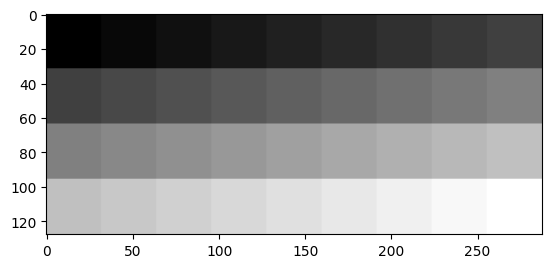

shape of RGB image = torch.Size([198, 255, 3])
Pixel at 0,0 : tensor([156, 147, 142], dtype=torch.uint8)  Shape: torch.Size([3])
green channel image shape = torch.Size([198, 255])


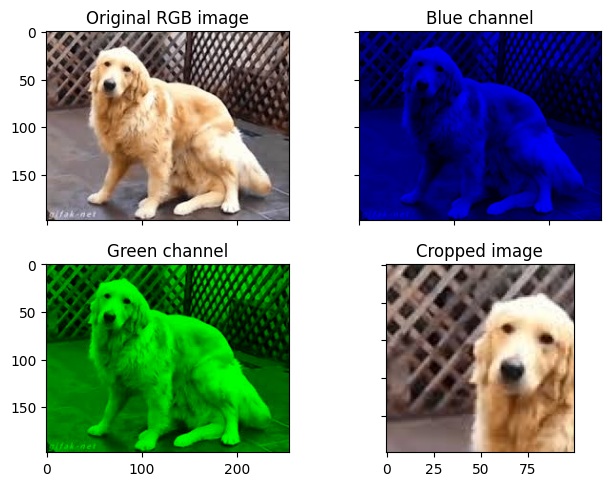

In [4]:
# A vector can be viewed as a 1-tensor, a matrix is 2-tensor,
# a scalar is 0-tensor. So the same slicing and dicing mechanics are
# fully applicable to tensors
# Here we show how to generate a random PyTorch tensor of specified shape
tensor = torch.rand((5, 5, 3))
print("Tensor with 3 dimensions: {}".format(tensor))
print("Shape of the tensor: {}".format(tensor.shape))

#An image is a tensor really. For instance consider the I49 single
# channel (gray level) image.
I49 = torch.tensor([[0,     8,  16, 24, 32, 40,   48,  56,  64],
                [64,   72,  80,  88,  96, 104, 112, 120, 128],
                [128, 136, 144, 152, 160, 168, 176, 184, 192],
                [192, 200, 208, 216, 224, 232, 240, 248, 255]])

# Display a numpy array (tensor) as image via opencv, after resizing
# to a bigger and more visble size.
img = cv2.resize(I49.numpy(), (288, 128), interpolation=cv2.INTER_NEAREST)
plt.imshow(img, cmap='gray')
plt.show()


def load_rgb_img(img_path):
    img = cv2.imread(img_path)
    # The following line converts BGR images (as read by opencv)
    # into RGB images.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Opencv reads images as numpy arrays. We convert it to PyTorch 
    # tensors
    img = torch.tensor(img)
    return img

curr_dir = os.getcwd()
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
# A RGB image of width W, height H is a 3-tensor of shape [H, W, 3].
# For instance this 199x256 dog image.
img = load_rgb_img(os.path.join('../../resources/images/dog3.jpg'))
print("shape of RGB image = {}".format(img.shape))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original RGB image')


# Slicing and dicing tensors
# The same logic of using indices to access elements applies to tensors. 
# For example, to access a single element in the tensor, we will need to
# provide 3 indices corresponding to the 3 axes.
# To acess RGB values of pixel at (row=12, col=30).
print("Pixel at 0,0 : {}  Shape: {}".format(img[12, 30, :],
                                            img[12, 30, :].shape ))

# Extract the Green channel of the dog image:
img_g = img[:, :, 1]
print("green channel image shape = {}".format(img_g.shape))

# Darken R and G channel of the image (so only Blue remains)
img_b = img
img_b[:, :, 0] = 0
img_b[:, :, 1] = 0
axs[0, 1].imshow(img_b)
axs[0, 1].set_title('Blue channel')

# Darken R and B channel of the image (so only Green remains)
img_g = load_rgb_img('../../resources/images/dog3.jpg') 
img_g[:, :, 0] = 0
img_g[:, :, 2] = 0
axs[1, 0].imshow(img_g)
axs[1, 0].set_title('Green channel')

# Cropping a 100x100 subimage out from the top left corner of the dog image
img = load_rgb_img('../../resources/images/dog3.jpg') 
img_cropped = img[0:100, 0:100, :]
axs[1, 1].imshow(img_cropped)
axs[1, 1].set_title('Cropped image')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()